# MNIST Handwriting Recognition Project

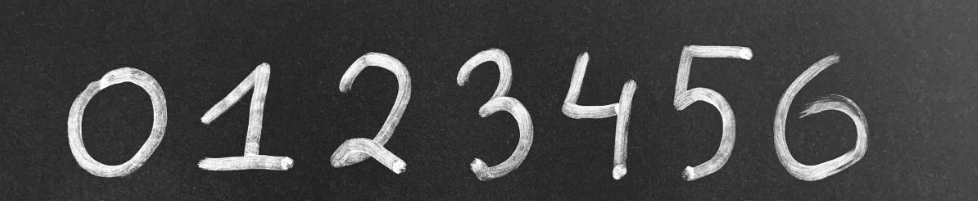

The MNIST Handwriting Recognition Project is an exciting venture into the world of computer vision and deep learning. MNIST, short for Modified National Institute of Standards and Technology, is a widely recognized dataset that consists of 28x28 grayscale images of handwritten digits (0-9). It serves as a benchmark in the field of machine learning and has been the starting point for countless machine learning journeys.

In this project, we will explore the fundamentals of neural networks and convolutional neural networks (CNNs) to classify these handwritten digits. We will start with a simple neural network, then enhance our model's performance by introducing a hidden layer, and finally, we'll experiment with a flattened array directly in a layer.

The project is divided into three parts, each demonstrating a different approach to solving the MNIST handwriting recognition problem. These parts will guide you through the process of setting up your neural network, training it, and evaluating its performance.

Whether you're a beginner looking to get started with deep learning or an experienced practitioner honing your skills, this project offers valuable insights and hands-on experience. By the end of it, you'll have a solid understanding of how to build and train neural networks for image classification tasks.

So, let's dive into the fascinating world of MNIST handwriting recognition and start building our models to recognize those handwritten digits with precision and accuracy.

In [1]:
# import important libraries and packages

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# loading dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

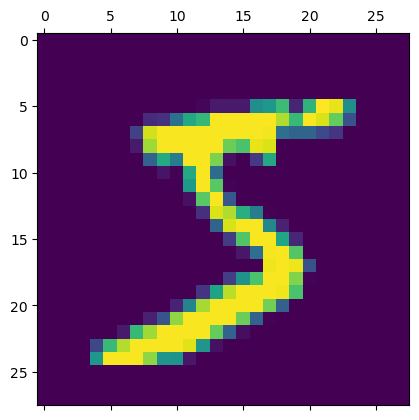

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train.max()

255

In [12]:
# scaling the feature variables. range: 0-1

X_train = X_train / 255
X_test = X_test / 255

In our MNIST Handwriting Recognition Project, "X" represents our input images of handwritten digits. To make these images compatible with machine learning and deep learning models, we flatten them into 1D arrays.

Why flatten?

* Simplification: Flattening simplifies the data for computational efficiency.
* Compatibility: Many libraries expect flat input.
* Feature Extraction: It allows models to learn features and patterns effectively.

Flattening preserves the information while making it easier for our models to process the data.

In [13]:
# we reshape X from matrix form to the array form

X_train_flatttened = X_train.reshape(len(X_train), X_train.shape[1]*X_train.shape[2])
X_test_flatttened = X_test.reshape(len(X_test), X_test.shape[1]*X_test.shape[2])

print(X_train_flatttened.shape)
print(X_test_flatttened.shape)

(60000, 784)
(10000, 784)


#### Neural Network Model

- **Model Type:** Sequential, meaning layers are stacked sequentially.

- **Dense Layer:** A fully connected layer with 10 output units.

  - **Input Shape:** Each input sample has 784 features (flattened MNIST image).

  - **Activation Function:** Sigmoid is used for non-linearity.

#### Model Compilation

- **Optimizer:** 'adam' optimizer for gradient-based weight updates.

- **Loss Function:** 'sparse_categorical_crossentropy' for multi-class classification.

- **Metrics:** Model performance metric is 'accuracy'.

#### Model Training

- **Training Data:** `X_train_flattened` and `y_train`.

- **Epochs:** The model is trained for 5 epochs (passes through the training data).


In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)

model.fit(X_train_flatttened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4577 - accuracy: 0.8806
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3032 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2829 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2732 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2664 - accuracy: 0.9257


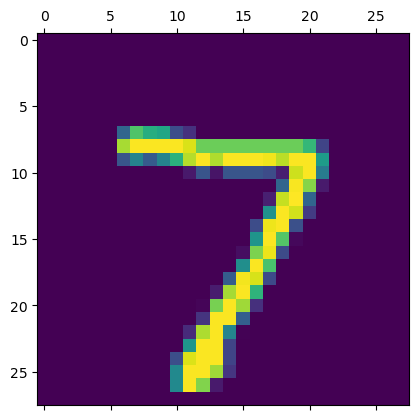

In [16]:
# checking the first observation in test data
plt.matshow(X_test[0])

In [17]:
y_predicted = model.predict(X_test_flatttened)

313/313 [==============================] - 1s 3ms/step


In [18]:
y_predicted[0]

array([2.2916079e-02, 2.9710998e-07, 7.5079128e-02, 9.3917251e-01,
       2.4235365e-03, 1.0576349e-01, 8.5206580e-07, 9.9966997e-01,
       6.6257365e-02, 6.1913753e-01], dtype=float32)

Our predicted values are in the form of probabilities. We need to check which digit has the maximum probability and then assign that number to the corresponding input vector

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[0]

7

In [21]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

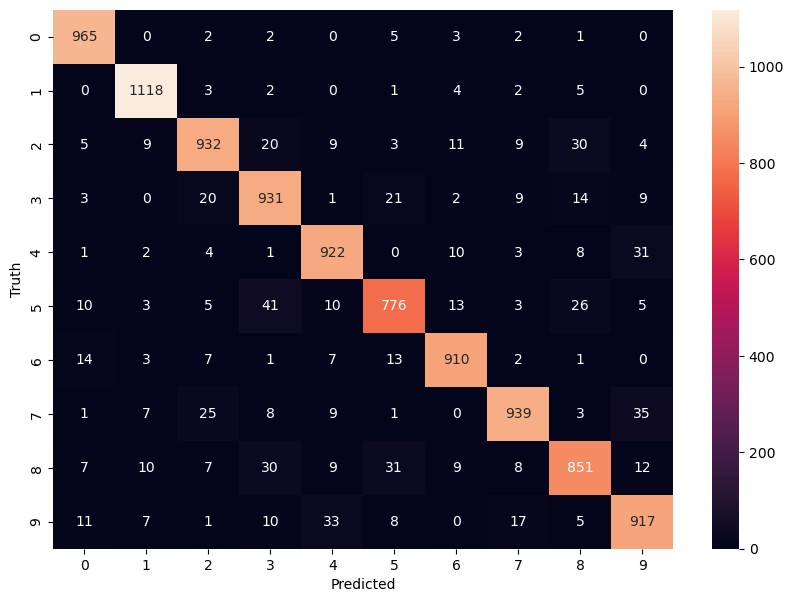

In [22]:
# heatmap for the confusion matrix

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
# accuracy for a model with no hidde layer
accuracy_score(y_test, y_predicted_labels)

0.9261

### Now we repeat the same procedure for a model with one hidden layer

#### Neural Network Model with Hidden Layer

- **Model Type:** Sequential, layers stacked sequentially.

- **Hidden Layer:** Added a hidden layer with 100 units and ReLU activation function.

  - **Input Shape:** Each input sample has 784 features (flattened MNIST image).

- **Output Layer:** A dense layer with 10 output units and sigmoid activation.

#### Model Compilation

- **Optimizer:** 'adam' optimizer for gradient-based weight updates.

- **Loss Function:** 'sparse_categorical_crossentropy' for multi-class classification.

- **Metrics:** Model performance metric is 'accuracy'.

#### Model Training

- **Training Data:** `X_train_flattened` and `y_train`.

- **Epochs:** The model is trained for 5 epochs.


In [24]:
# adding the hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)

model.fit(X_train_flatttened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2764 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1234 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0863 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0512 - accuracy: 0.9842


In [25]:
y_predicted = model.predict(X_test_flatttened)

313/313 [==============================] - 1s 4ms/step


In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(95.72222222222221, 0.5, 'Truth')

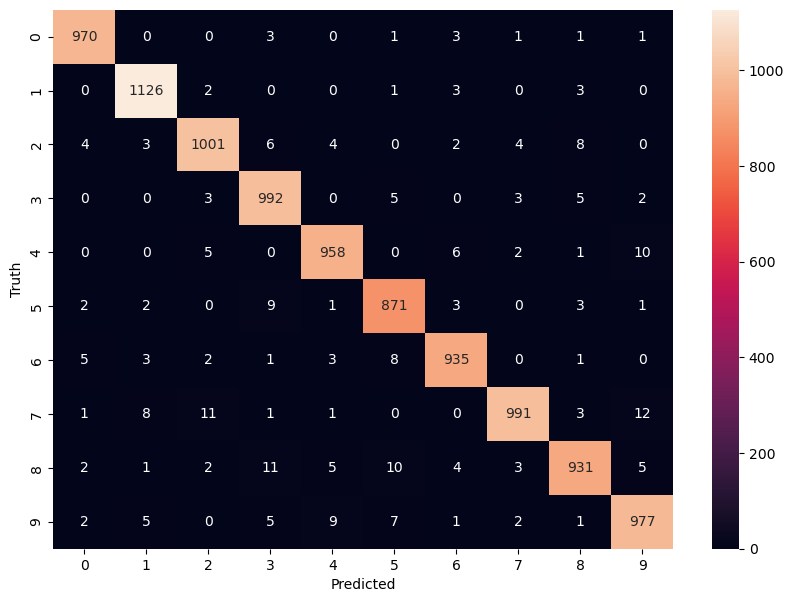

In [27]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
# accuracy score for a model with one hidden layer
accuracy_score(y_test, y_predicted_labels)

0.9752

### A model with a Flatten layer instead of reshaping 

#### Neural Network Model with Flatten Layer

- **Model Type:** Sequential, layers stacked sequentially.

- **Flatten Layer:** Flattening the input shape to match the dataset dimensions.

  - **Input Shape:** Preserves the original shape of the training data (`X_train.shape[1]`, `X_train.shape[2]`).

- **Hidden Layer:** A dense layer with 100 units and ReLU activation function.

- **Output Layer:** A dense layer with 10 output units and sigmoid activation.

#### Model Compilation

- **Optimizer:** 'adam' optimizer for gradient-based weight updates.

- **Loss Function:** 'sparse_categorical_crossentropy' for multi-class classification.

- **Metrics:** Model performance metric is 'accuracy'.

#### Model Training

- **Training Data:** `X_train` and `y_train`.

- **Epochs:** The model is trained for 5 epochs.


In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2778 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1248 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0861 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0662 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0512 - accuracy: 0.9843


In [30]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(95.72222222222221, 0.5, 'Truth')

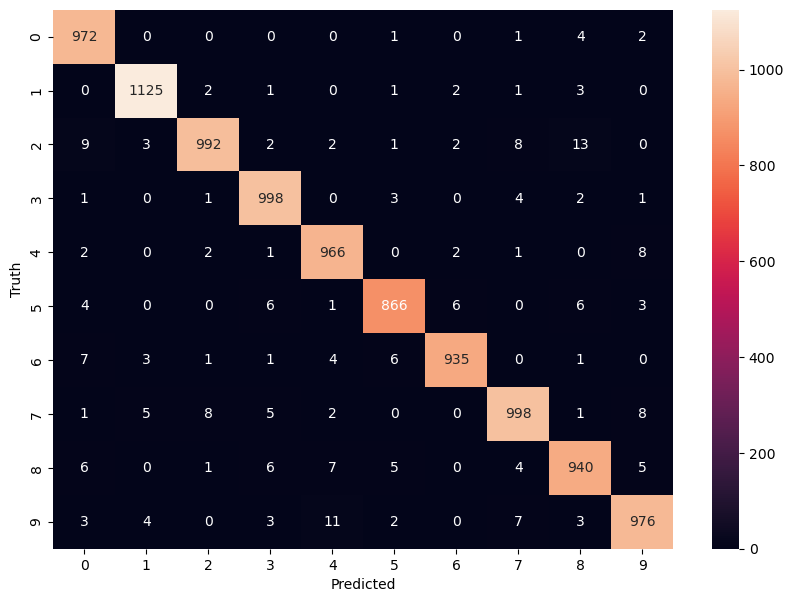

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
accuracy_score(y_test, y_predicted_labels)

0.9768

### Conclusion

In our MNIST Handwriting Recognition Project, we experimented with different neural network architectures to classify handwritten digits. Here's what we found:

- **No Hidden Layer:** Our initial model, without any hidden layers, achieved an accuracy of 92.61%. This baseline accuracy provided a solid starting point.

- **One Hidden Layer:** When we introduced a single hidden layer, our accuracy significantly improved. With this addition, our model's accuracy rose to around 97%, showcasing the power of hidden layers in capturing complex patterns within the data.

- **Flatten Layer and Hidden Layer:** By using a flatten layer to maintain the original data shape and adding a hidden layer, our accuracy reached approximately 97% as well. This approach allowed the network to learn intricate features from the flattened input, leading to impressive recognition capabilities.

In summary, the introduction of hidden layers, especially when combined with a flatten layer to preserve the data's structure, greatly enhanced our model's accuracy. These results highlight the importance of model architecture in deep learning tasks, demonstrating how even a single hidden layer can significantly boost performance. Our journey through different architectures not only improved accuracy but also deepened our understanding of neural networks, paving the way for more advanced applications in the future.